## Problem Statement

Your analysis will help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.

Find the important factors which can help in admissions to IVY league colleges and how these factors are inter-related to each other.

### Column Profiling

1. Serial No. (Unique row ID)
2. GRE Scores (out of 340)
3. TOEFL Scores (out of 120)
4. University Rating (out of 5)
5. Statement of Purpose and Letter of Recommendation Strength (out of 5)
6. Undergraduate GPA (out of 10)
7. Research Experience (either 0 or 1)
8. Chance of Admit (ranging from 0 to 1)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind
from scipy.stats import pearsonr


from sklearn.model_selection import train_test_split  # train and test split
from sklearn.preprocessing import StandardScaler  # standardisation
import statsmodels.api as sm  # linear regression
from sklearn.metrics import r2_score   # sklearn r2_score
from statsmodels.tools.eval_measures import rmse  # root mean square error
from statsmodels.tools.eval_measures import meanabs,mse  # mean absolute error


from sklearn.linear_model import LinearRegression, Ridge,Lasso  # sklearn Linear Regression, Ridge, Lasso

from sklearn.preprocessing import PolynomialFeatures  # for creating features with degrees

In [2]:
# loading the dataset
df = pd.read_csv('C:/Users/hp/Downloads/Jamboree_Admission.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
# checking shape
df.shape

(500, 9)

In [4]:
# renaming columns
df.rename(columns = {'LOR ' : 'LOR','Chance of Admit ' : 'Chance of Admit'},inplace=True)

In [5]:
# droping the Serial No. column as index can represent each row.

df = df.drop('Serial No.',axis=1)

In [6]:
# checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [7]:
# checking null values
df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

No null value present in the dataset.

In [8]:
# checking duplicate rows

df.duplicated().sum()

0

No duplicate rows are there in the dataset.

In [9]:
# statistical summary of the dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [10]:
# categorical columns

cat_cols = ['University Rating','Research','SOP', 'LOR']

In [11]:
# numerical columns

num_cols = ['GRE Score', 'TOEFL Score', 'CGPA']

## Univariate Analysis

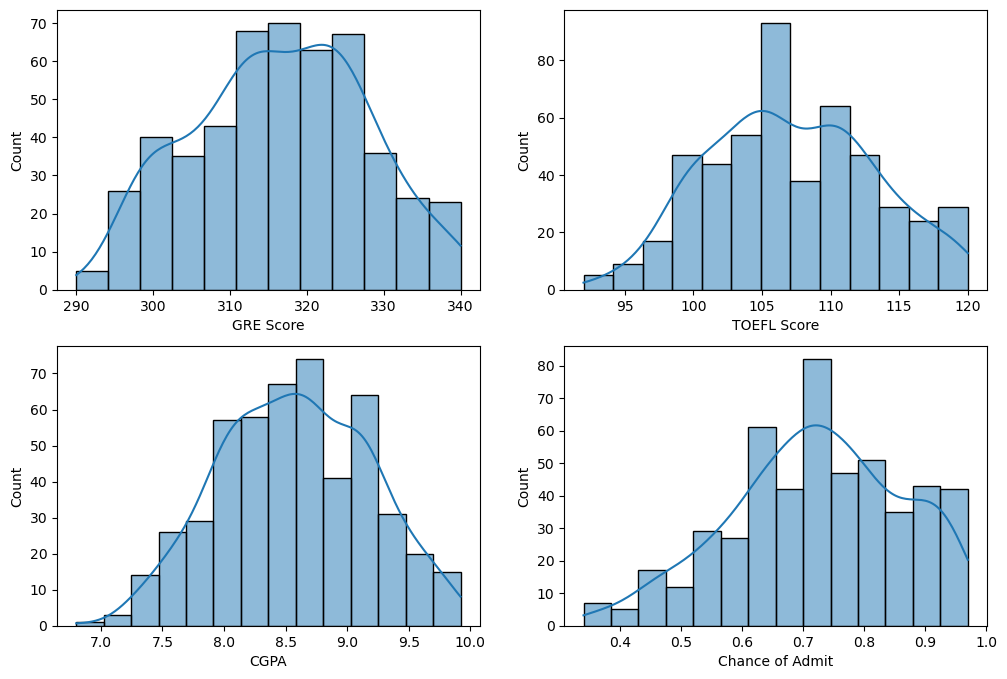

In [12]:
# distribution plot for numerical columns

rows, cols = 2, 2
fig, axs = plt.subplots(rows,cols, figsize=(12, 8))
index = 0
for row in range(rows):
    for col in range(cols):
        sns.histplot(df[num_cols[index]], kde=True, ax=axs[row,col])
        index += 1
    break
        
sns.histplot(df[num_cols[-1]], kde=True, ax=axs[1,0])
sns.histplot(df['Chance of Admit'], kde=True, ax=axs[1,1])
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_16380\3377755978.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df['GRE Score'], kde=False)


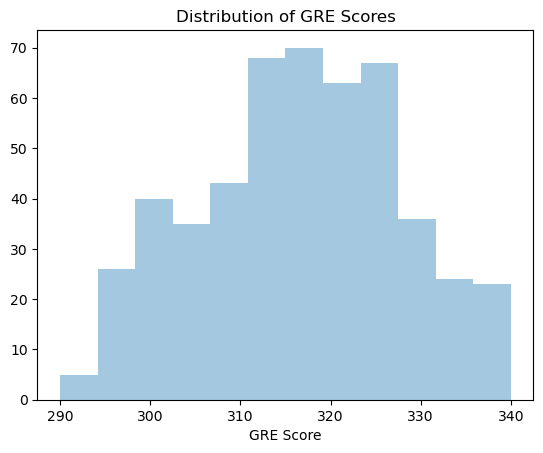

C:\Users\hp\AppData\Local\Temp\ipykernel_16380\3377755978.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df['TOEFL Score'], kde=False)


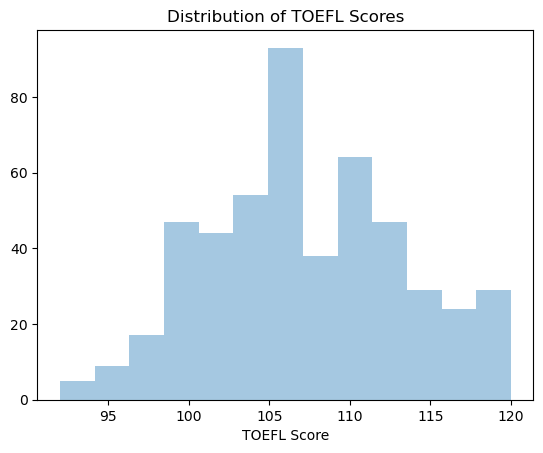

C:\Users\hp\AppData\Local\Temp\ipykernel_16380\3377755978.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df['University Rating'], kde=False)


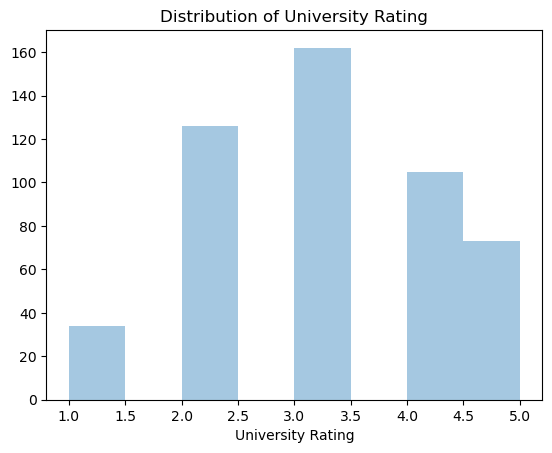

C:\Users\hp\AppData\Local\Temp\ipykernel_16380\3377755978.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df['SOP'], kde=False)


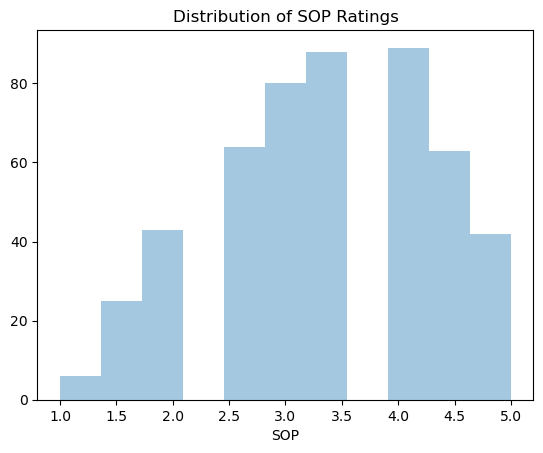

C:\Users\hp\AppData\Local\Temp\ipykernel_16380\3377755978.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df['CGPA'], kde=False)


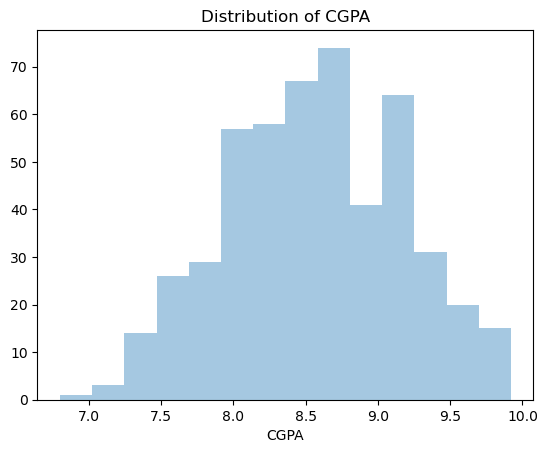

In [13]:
fig = sns.distplot(df['GRE Score'], kde=False)
plt.title("Distribution of GRE Scores")
plt.show()
fig = sns.distplot(df['TOEFL Score'], kde=False)
plt.title("Distribution of TOEFL Scores")
plt.show()
fig = sns.distplot(df['University Rating'], kde=False)
plt.title("Distribution of University Rating")
plt.show()
fig = sns.distplot(df['SOP'], kde=False)
plt.title("Distribution of SOP Ratings")
plt.show()
fig = sns.distplot(df['CGPA'], kde=False)
plt.title("Distribution of CGPA")
plt.show()
plt.show()

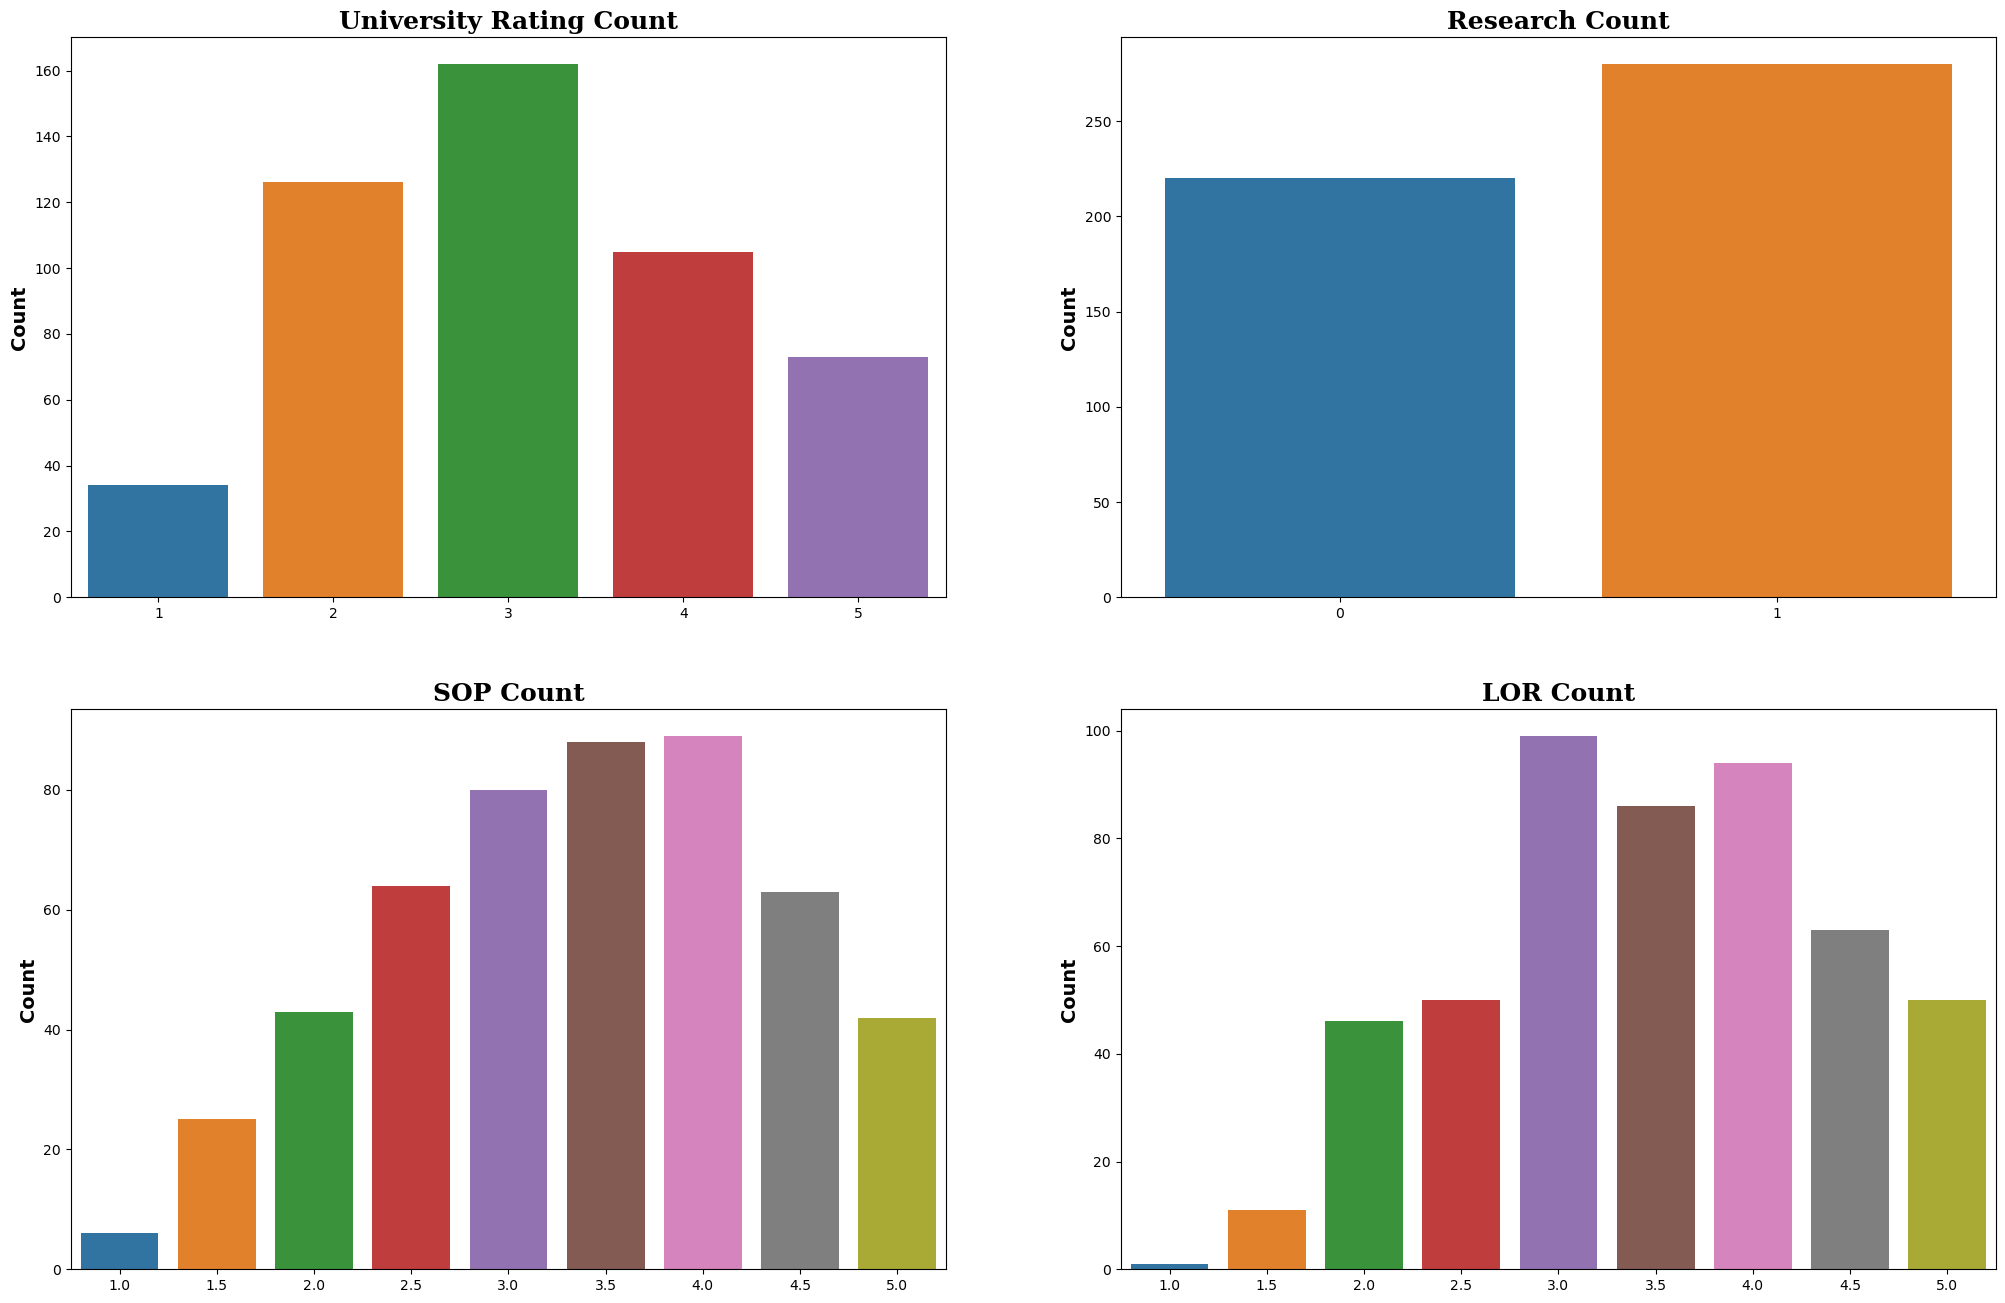

In [14]:
# countplot for categorical columns/ variables

fig = plt.figure(figsize = (14,16))


fig.subplots_adjust(right = 1.5)

for plot in range(1,len(cat_cols)+1):
    ax0 = plt.subplot(2,2,plot)
    sns.countplot(data = df,
                  x = cat_cols[plot-1])
    
    plt.xlabel('')
    plt.ylabel('Count',fontsize=14,fontweight='bold')
    plt.title(f'{cat_cols[plot-1]} Count',font = 'serif',fontsize = 18,fontweight="bold")


**Insight**

    1. 75% of the students scored less than 325 score(Out of 340) with minimum score of 290 in GRE.
    2. 75% of the students scored less than 112 score(Out of 120) with minimum score of 92 in TOEFL.
    3. 25% of the students got less than ~8.13 CGPA in their graduation.
    4. 50% of the students have less than 0.72 probability of getting admission.(Only 50% students have probability between 0.72 to 0.97 of getting admissions.)

## Outlier Detection

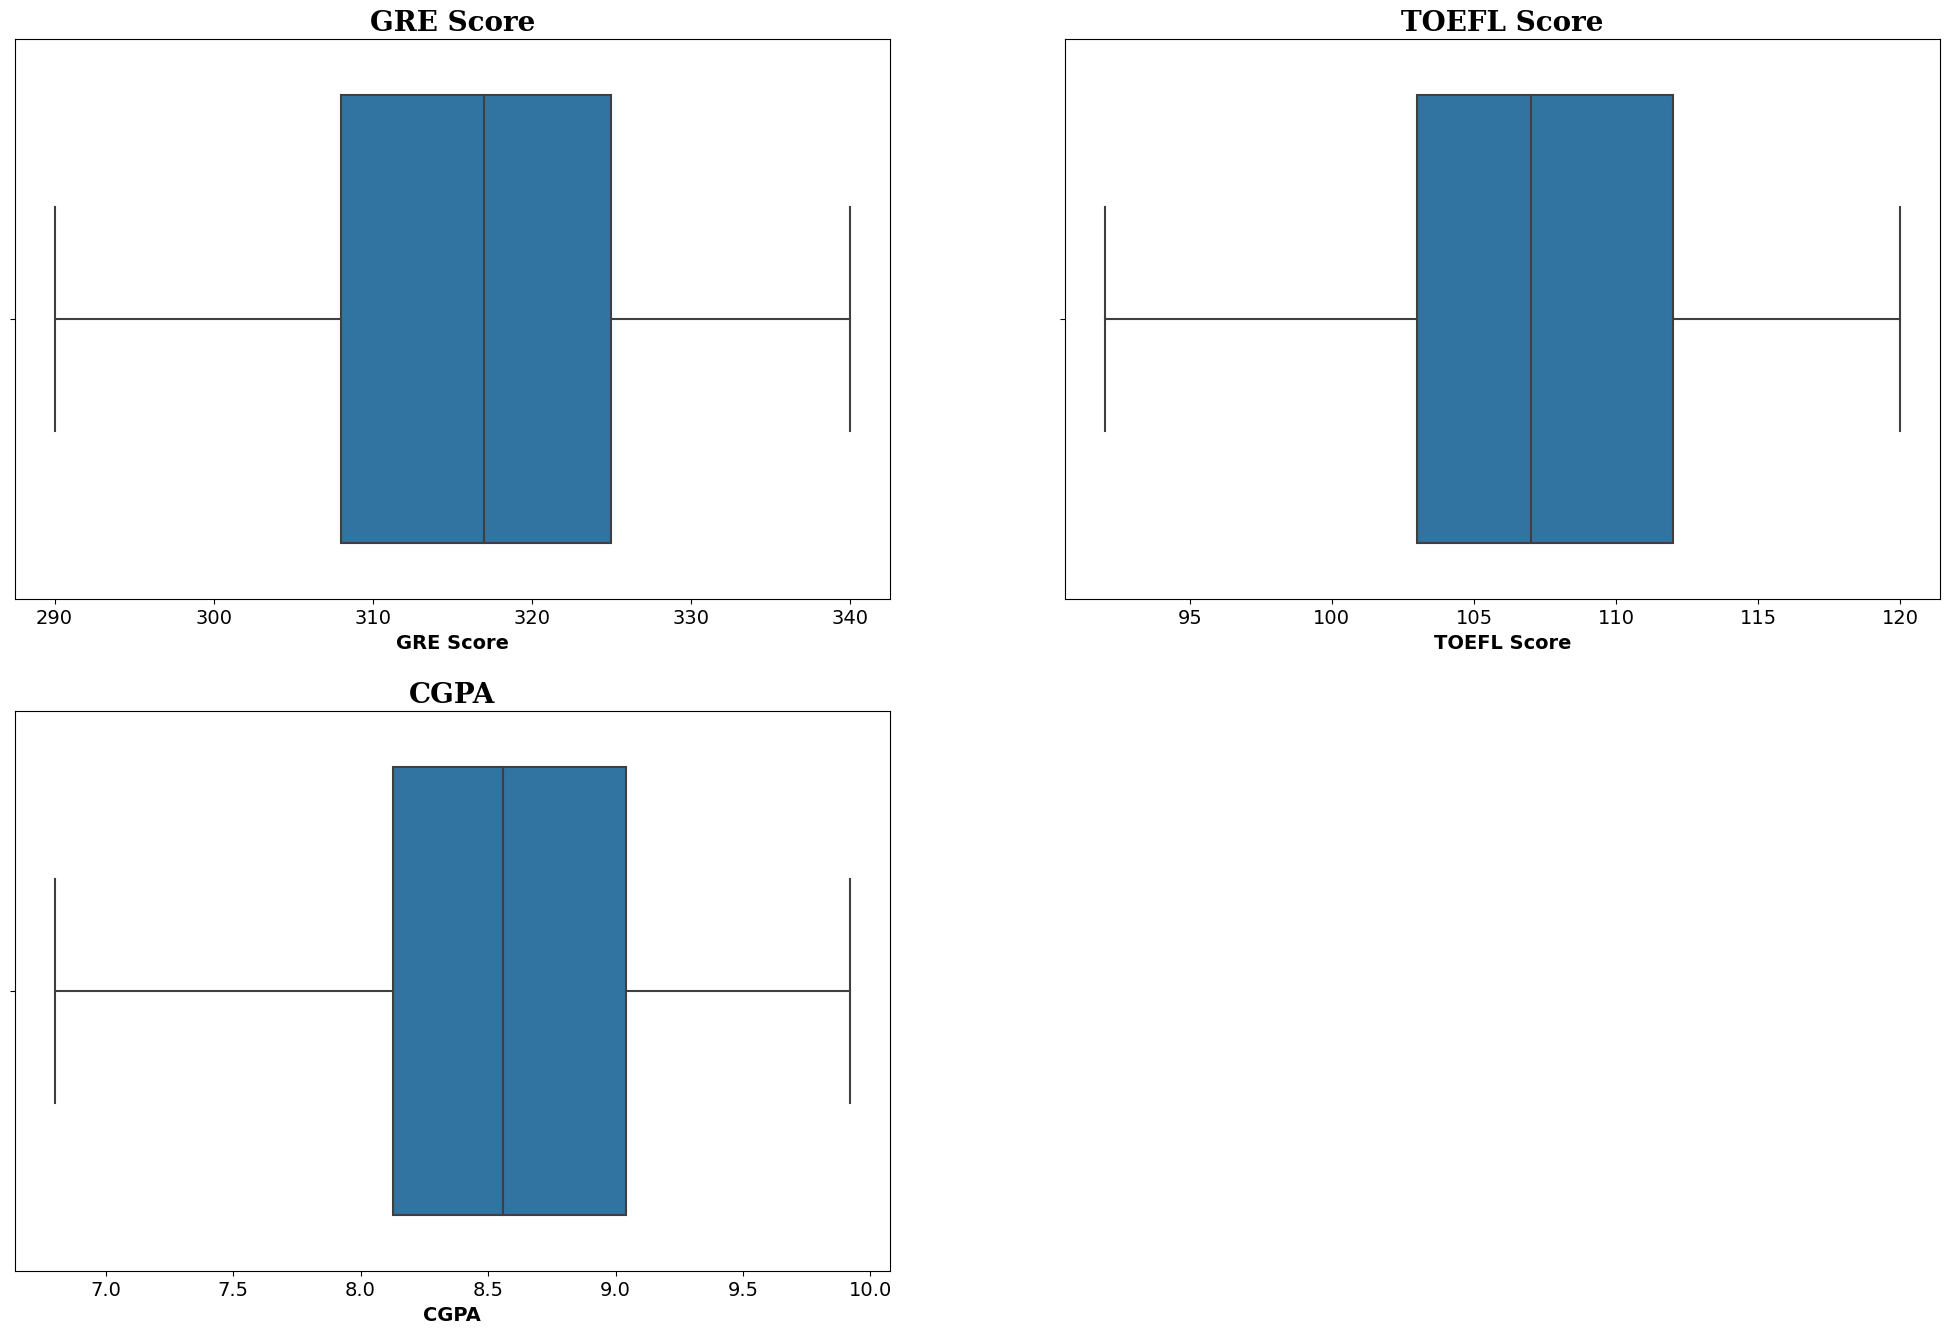

In [15]:
# distribution / histogram plot for numerical columns

fig = plt.figure(figsize = (14,16))

fig.subplots_adjust(right = 1.5)

for plot in range(1,len(num_cols)+1):
    plt.subplot(2,2,plot)
    sns.boxplot(data = df,
                  x = num_cols[plot-1])
    plt.xticks(fontsize=14)
    plt.xlabel(f'{num_cols[plot-1]}',fontsize=14,fontweight='bold')
    plt.title(f'{num_cols[plot-1]}',font = 'serif',fontsize = 20,fontweight="bold")
plt.show()


Found no outlier in GRE Score, TOEFL Score and CGPA.

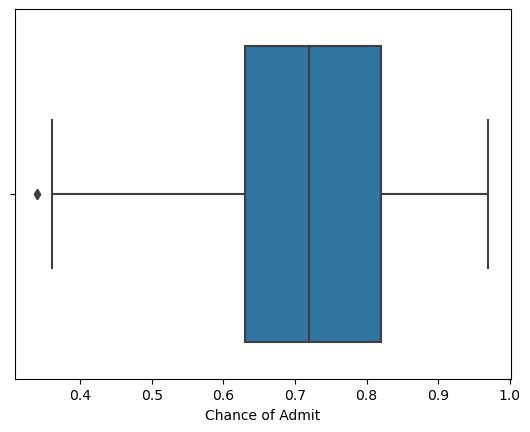

In [16]:

sns.boxplot(data = df, x ='Chance of Admit')
plt.show()

In [17]:
Q1 = df['Chance of Admit'].quantile(0.25)
Q3 = df['Chance of Admit'].quantile(0.75)
IQR = Q3 - Q1
# identify outliers
threshold = 1.5
outliers = df[(df['Chance of Admit'] < Q1 - threshold * IQR) | (df['Chance of Admit'] > Q3 + threshold * IQR)]
outliers

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
92,298,98,2,4.0,3.0,8.03,0,0.34
376,297,96,2,2.5,2.0,7.43,0,0.34


**Insight**

There are only 2 outliers present in Chance of Admit which means that there are 2 students who have very less chance of admission which might be because of their performance.

## Bi-variate Analysis

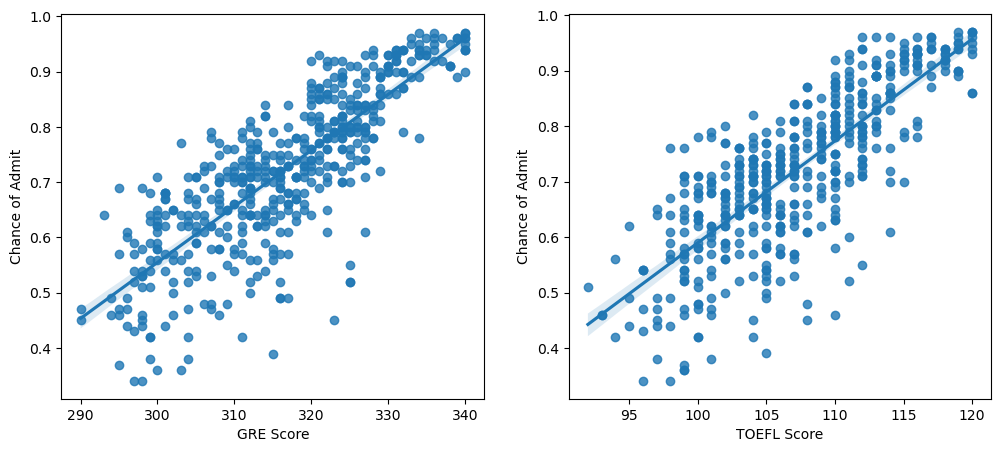

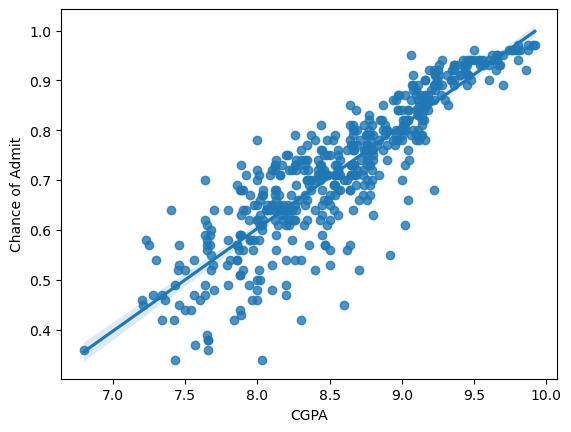

In [18]:
# check relation bw continuous variables & target variable
fig, axs = plt.subplots(1, 2, figsize=(12,5))

sns.regplot(x=num_cols[0], y='Chance of Admit', data=df, ax=axs[0])
sns.regplot(x=num_cols[1], y='Chance of Admit', data=df, ax=axs[1])
plt.show()
sns.regplot(x=num_cols[2], y='Chance of Admit', data=df)
plt.show()

**Insight**

Students with high GRE Score or high TOEFL Score or High CGPA have higher Chance of Admit.

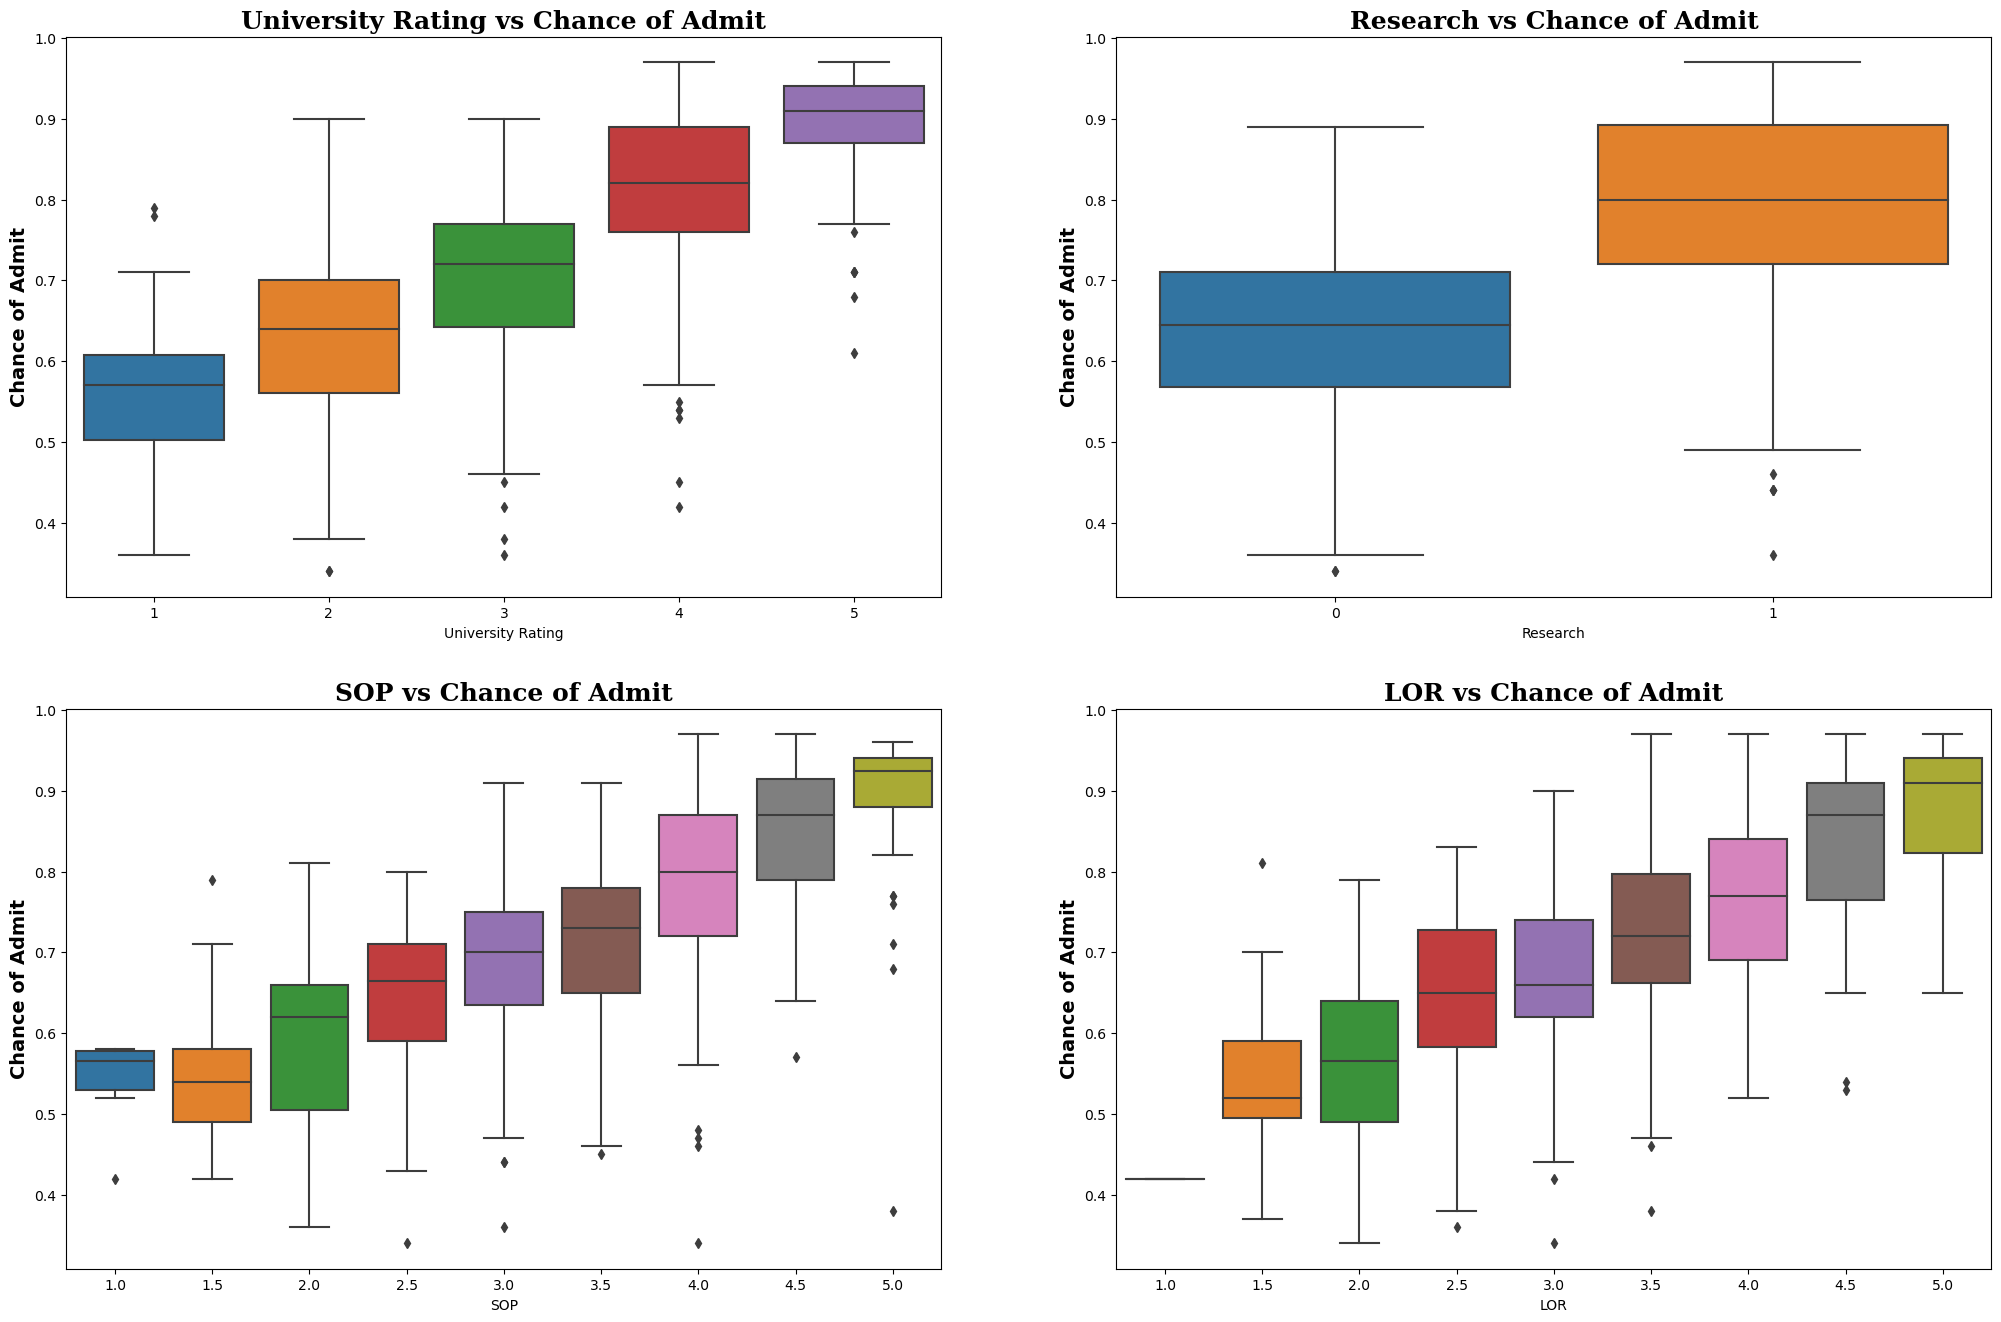

In [19]:
fig = plt.figure(figsize = (14,16))


fig.subplots_adjust(right = 1.5)

for plot in range(1,len(cat_cols)+1):
    ax0 = plt.subplot(2,2,plot)
    sns.boxplot(x=cat_cols[plot-1], y='Chance of Admit', data=df)
    plt.xlabel(cat_cols[plot-1])
    plt.ylabel('Chance of Admit',fontsize=14,fontweight='bold')
    plt.title(f'{cat_cols[plot-1]} vs Chance of Admit',font = 'serif',fontsize = 18,fontweight="bold")



**Insights**

- As the score in University rating, SOP, LOR increases, Chance of Admit also increases.
- Students who have the research experience have more chances of Admin as compared to other students who don't have the research experience.

### Understanding the relation between different factors responsible for graduate admissions


#### People with higher GRE Scores also have higher TOEFL Scores?

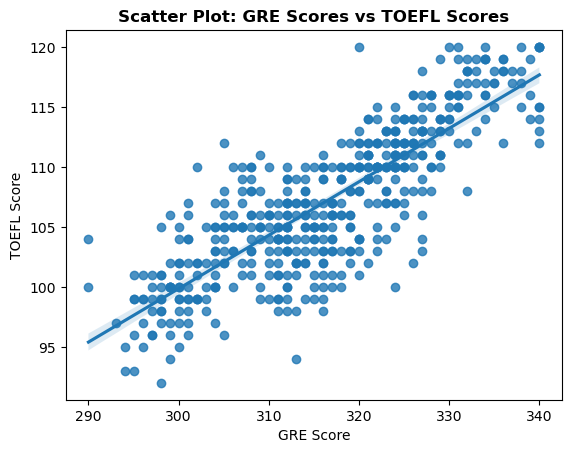

In [20]:
# scatter plot between GRE Score and TOEFL Score to understand relation between them

sns.regplot(data = df, x = 'GRE Score', y ='TOEFL Score')
plt.title('Scatter Plot: GRE Scores vs TOEFL Scores',fontweight = 'bold')
plt.show()

In [21]:
df[['GRE Score','TOEFL Score']].corr(method='pearson')  # pearson correlation between GRE and TOEFL Score

,GRE Score,TOEFL Score
GRE Score,1.0000,0.8272
TOEFL Score,0.8272,1.0000


 **Insight**
 
 We can observe with visual analysis and pearson correlation that there students with high GRE Score have high TOEFL Score and certainly there is a relation between them which is justified because both TOEFL and GRE have a verbal section which although not similar are relatable.

#### People with higher GRE Scores also have higher CGPA?

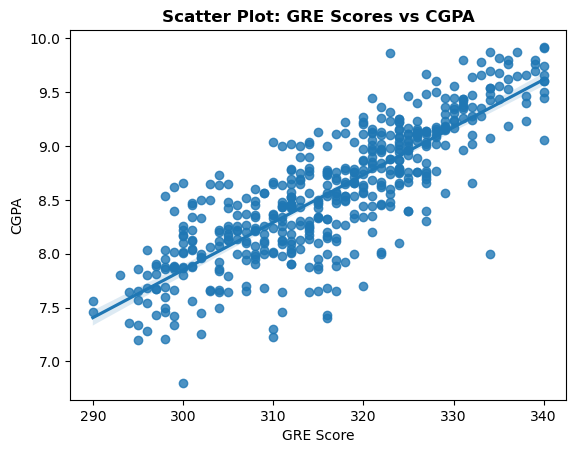

In [22]:
# scatter plot between GRE Score and TOEFL Score to understand relation between them

sns.regplot(data = df, x = 'GRE Score', y ='CGPA')
plt.title('Scatter Plot: GRE Scores vs CGPA',fontweight = 'bold')
plt.show()

In [23]:
df[['GRE Score','CGPA']].corr(method='pearson')  # pearson correlation between GRE Score and CGPA

,GRE Score,CGPA
GRE Score,1.000000,0.825878
CGPA,0.825878,1.000000


 **Insight**
 
 We can observe with visual analysis and pearson correlation that there students with high GRE Score have high CGPA and certainly there is a relation between them.

### A student with a higher CGPA has a good LOR.

<Axes: xlabel='CGPA', ylabel='LOR'>

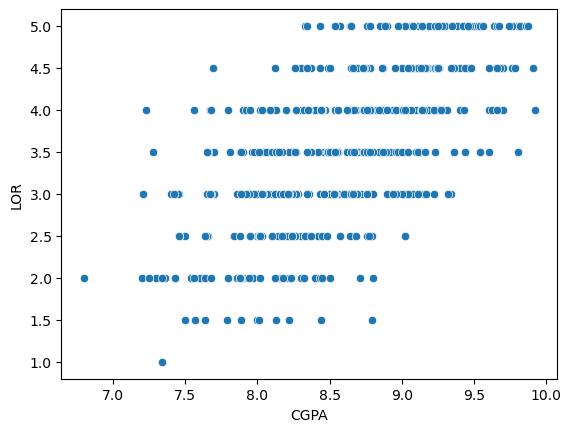

In [24]:
sns.scatterplot(data = df, x = 'CGPA', y ='LOR')

In [25]:
df[['CGPA','LOR']].corr(method = 'pearson')  # pearson correlation between LOR and CGPA

,CGPA,LOR
CGPA,1.000000,0.637469
LOR,0.637469,1.000000


**Insight**

LORs are not that related with CGPA so it is clear that a persons LOR is not dependent on that persons CGPA. 

#### Does having Research experience increase students:
        1. Chance of Admit
        2. LOR (Letter of Recommendation)
        3. University Rating

### Research vs Chance of Admit

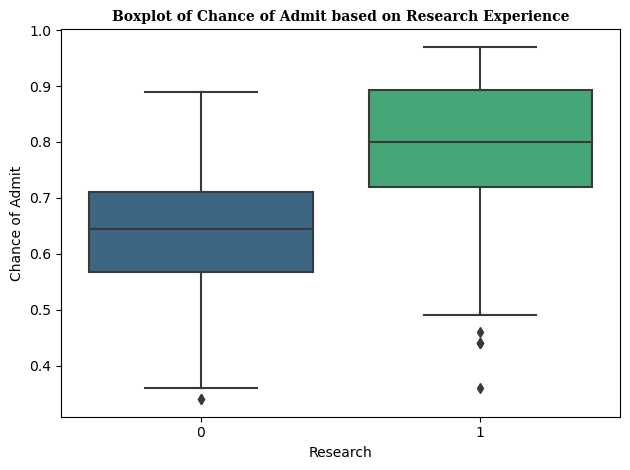

In [26]:
# boxplot between Research and Chance of Admit

sns.boxplot(data = df, x = 'Research', y = 'Chance of Admit',palette='viridis')
plt.title(f'Boxplot of Chance of Admit based on Research Experience',font = 'serif',fontsize=10,fontweight="bold")
plt.tight_layout()



**Insight**

Median students having reasearch experience has more than 0.8 chances of admit.

**Performing Hypothesis test to check if there is any relationship between Having Research experience and Chances of Admission.**

**Null Hypothesis, H0:** Having Research experience and Chances of Admission are independent.

**Alternate Hypothesis, Ha:** Having Research experience and Chances of Admission are dependent.

In [27]:
with_research = df[df['Research'] == 1]['Chance of Admit']  # students chances of admission having research exp. 
without_research = df[df['Research'] == 0]['Chance of Admit']  # students chances of admit not having research exp.

In [28]:
# performing ttest_ind for significance level of 0.05
alpha = 0.05

test_statistics, p_value = ttest_ind(with_research,without_research)
print(f'p_value : {p_value:.4f}')

if p_value < alpha:
    print("Reject the null hypothesis. There is a relation between Chances of Admission and Having Research exp.")
else:
    print("Fail to reject the null hypothesis. There is no relation between Chances of Admission  and Having Research exp.")


p_value : 0.0000
Reject the null hypothesis. There is a relation between Chances of Admission and Having Research exp.


### Research vs LOR

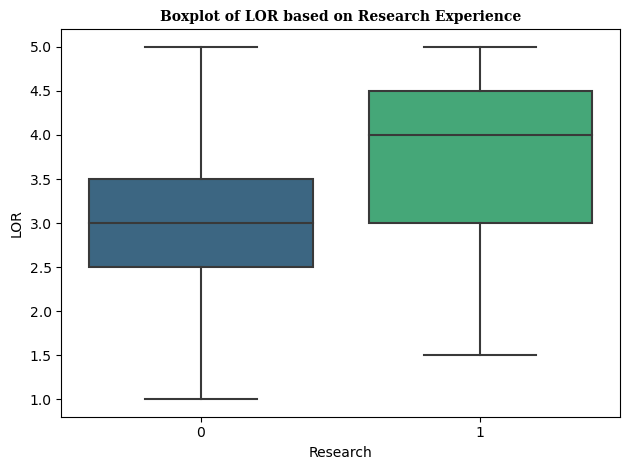

In [29]:
# boxplot between Research and LOR

sns.boxplot(data = df, x = 'Research', y = 'LOR',palette='viridis')
plt.title(f'Boxplot of LOR based on Research Experience',font = 'serif',fontsize=10,fontweight="bold")
plt.tight_layout()



**Insight**

Median students having reasearch experience has LOR strength of more than 4.0

**Performing Hypothesis test to check if there is any relationship between Having Research experience and LOR strength.**

**Null Hypothesis, H0:** Having Research experience and LOR are independent.

**Alternate Hypothesis, Ha:** Having Research experience and LOR are dependent.

In [30]:
with_research = df[df['Research'] == 1]['LOR']  # students LOR having research exp. 
without_research = df[df['Research'] == 0]['LOR']  # students LOR not having research exp.

In [31]:
# performing ttest_ind for significance level of 0.05
alpha = 0.05

test_statistics, p_value = ttest_ind(with_research,without_research)
print(f'p_value : {p_value:.4f}')

if p_value < alpha:
    print("Reject the null hypothesis. There is a relation between LOR and Having Research exp.")
else:
    print("Fail to reject the null hypothesis. There is no relation between LOR and Having Research exp.")


p_value : 0.0000
Reject the null hypothesis. There is a relation between LOR and Having Research exp.


### Research vs University Rating

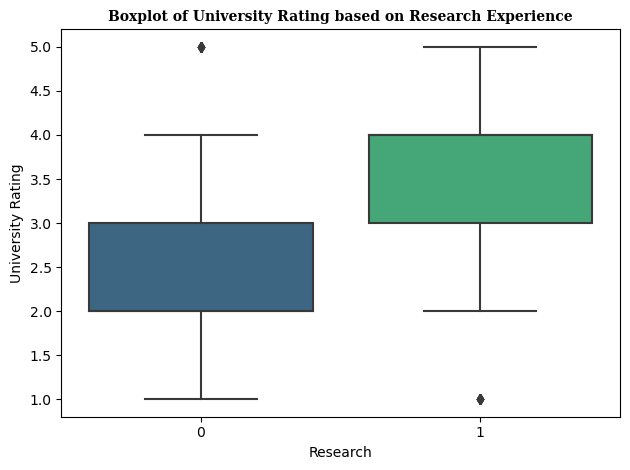

In [32]:
# boxplot between Research and University Rating

sns.boxplot(data = df, x = 'Research', y = 'University Rating',palette='viridis')
plt.title(f'Boxplot of University Rating based on Research Experience',font = 'serif',fontsize=10,fontweight="bold")
plt.tight_layout()



**Insight**

Top 75 percentile students with research experience got more than 3.0 University rating.

There are few students with no research experience got 5.0 university rating and few students with research experience got 1.0 university rating.

**Performing Hypothesis test to check if there is any relationship between Having Research experience and University Rating.**

**Null Hypothesis, H0:** Having Research experience and University Rating are independent.

**Alternate Hypothesis, Ha:** Having Research experience and University Rating are dependent.

In [33]:
with_research = df[df['Research'] == 1]['University Rating']  # students University Rating having research exp. 
without_research = df[df['Research'] == 0]['University Rating']  # students University Rating not having research exp.

In [34]:
# performing ttest_ind for significance level of 0.05
alpha = 0.05

test_statistics, p_value = ttest_ind(with_research,without_research)
print(f'p_value : {p_value:.4f}')

if p_value < alpha:
    print("Reject the null hypothesis. There is a relation between University Rating and Having Research exp.")
else:
    print("Fail to reject the null hypothesis. There is no relation between University Rating and Having Research exp.")


p_value : 0.0000
Reject the null hypothesis. There is a relation between University Rating and Having Research exp.


**Insight**

We found that Research Experience does increases the students Chances of Admission, LOR strength and University Rating.

## Linear Regression

Lets split the dataset with training and testing set and prepare the inputs and outputs

In [35]:
# independent features / columns

X = df.drop(['Chance of Admit'], axis=1)
print('X:',X.shape)

# target / dependent feature / column
y = df['Chance of Admit']
print('Y:',y.shape)

X: (500, 7)
Y: (500,)


### Train and Test Split

In [36]:

from sklearn.model_selection import train_test_split  # train and test split
from sklearn.preprocessing import StandardScaler  # standardisation
import statsmodels.api as sm  # linear regression
from sklearn.metrics import r2_score   # sklearn r2_score
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error


In [37]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=10)

print('X_train',X_train.shape)

print('y_train',y_train.shape)

print('X_test',X_test.shape)

print('y_test',y_test.shape)

X_train (400, 7)
y_train (400,)
X_test (100, 7)
y_test (100,)


In [38]:
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
305,321,109,3,3.5,3.5,8.80,1
107,338,117,4,3.5,4.5,9.46,1
350,318,107,3,3.0,3.5,8.27,1
334,312,107,4,4.5,4.0,8.65,1
142,331,115,5,4.0,3.5,9.44,1


In [39]:
y_train.head()

305    0.74
107    0.91
350    0.74
334    0.73
142    0.92
Name: Chance of Admit, dtype: float64

In [40]:
#Standardization

X_train_columns=X_train.columns
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)

X_train_scaled[:5]


array([[ 0.41696327,  0.30766044, -0.05971011,  0.16746978,  0.06995822,
         0.38575802,  0.87299172],
       [ 1.89756392,  1.62561683,  0.82488417,  0.16746978,  1.14623859,
         1.45416041,  0.87299172],
       [ 0.1556808 , -0.02182865, -0.05971011, -0.33619872,  0.06995822,
        -0.47220148,  0.87299172],
       [-0.36688413, -0.02182865,  0.82488417,  1.17480677,  0.60809841,
         0.14293929,  0.87299172],
       [ 1.28790483,  1.29612773,  1.70947846,  0.67113827,  0.06995822,
         1.42178458,  0.87299172]])

In [41]:
X_train=pd.DataFrame(X_train_scaled, columns=X_train_columns)  # standardised X train set 

In [42]:
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.416963,0.307660,-0.059710,0.167470,0.069958,0.385758,0.872992
1,1.897564,1.625617,0.824884,0.167470,1.146239,1.454160,0.872992
2,0.155681,-0.021829,-0.059710,-0.336199,0.069958,-0.472201,0.872992
3,-0.366884,-0.021829,0.824884,1.174807,0.608098,0.142939,0.872992
4,1.287905,1.296128,1.709478,0.671138,0.069958,1.421785,0.872992


## Linear Regression using Statsmodel Library

- Adjusted. R-squared reflects the fit of the model. R-squared values range from 0 to 1,
where a higher value generally indicates a better fit, assuming certain conditions are
met.
- const coefficient is your Y-intercept. It means that if both the Interest_Rate and
Unemployment_Rate coefficients are zero, then the expected output (i.e., the Y) would
be equal to the const coefficient.
- Interest_Rate coefficient represents the change in the output Y due to a change of one
unit in the interest rate (everything else held constant)
- Unemployment_Rate coefficient represents the change in the output Y due to a change
of one unit in the unemployment rate (everything else held constant)
- std err reflects the level of accuracy of the coefficients. The lower it is, the higher is the
level of accuracy
- P >|t| is your p-value. A p-value of less than 0.05 is considered to be statistically
significant
- Confidence Interval represents the range in which our coefficients are likely to fall (with a
likelihood of 95%)


In [43]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train.values,X_train).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     265.1
Date:                Fri, 29 Dec 2023   Prob (F-statistic):          2.29e-144
Time:                        01:33:05   Log-Likelihood:                 559.41
No. Observations:                 400   AIC:                            -1103.
Df Residuals:                     392   BIC:                            -1071.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7184      0.00

**Insight**

R-squared and Adjusted r-squared for the model is 0.826 and 0.822 which seems like a good model. Also, the p_value for SOP and University Rating is above(greater than) significance level(0.05) which means the cofficients have less impact on predicting the Chance of Admit (Target). To confirm if this is valid, we will drop them one by one and see what is the impact on the performance of the model.

In [44]:
# dropping SOP 

X_train_new = X_train.drop(columns='SOP')

In [45]:
model1 = sm.OLS(y_train.values,X_train_new).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     308.7
Date:                Fri, 29 Dec 2023   Prob (F-statistic):          2.47e-145
Time:                        01:33:05   Log-Likelihood:                 558.71
No. Observations:                 400   AIC:                            -1103.
Df Residuals:                     393   BIC:                            -1075.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7184      0.00

In [46]:
# dropping University Rating

X_train_new = X_train_new.drop(columns='University Rating')

model1 = sm.OLS(y_train.values,X_train_new).fit()
print(model1.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     367.9
Date:                Fri, 29 Dec 2023   Prob (F-statistic):          5.64e-146
Time:                        01:33:05   Log-Likelihood:                 557.15
No. Observations:                 400   AIC:                            -1102.
Df Residuals:                     394   BIC:                            -1078.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7184      0.003    237.287      

### No Multi-collinearity

In regression, multicollinearity refers to the extent to which independent variables are correlated. Multicollinearity affects the coefficients and p-values, but it does not influence the predictions, precision of the predictions, and the goodness-of-fit statistics. 

### VIF(Variance Inflation Factor)

VIF score of an independent variable represents how well the variable is explained by other independent variables.
So, the closer the R^2 value to 1, the higher the value of VIF and the higher the multicollinearity with the particular independent variable.


In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(dataset,col):
    dataset=dataset.drop(columns=col,axis=1)
    vif=pd.DataFrame()
    vif['features']=dataset.columns
    vif['VIF_Value']=[variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
    return vif


calculate_vif(X_train_new,[])

,features,VIF_Value
0,const,1.000000
1,GRE Score,4.450573
2,TOEFL Score,3.903175
3,LOR,1.712747
4,CGPA,4.463474
5,Research,1.508381


**VIF looks fine and hence, we can go ahead with the predictions**

In [48]:
X_test_scaled = scaler.transform(X_test)

X_test=pd.DataFrame(X_test_scaled, columns=X_train_columns)

X_test = sm.add_constant(X_test)


X_test_del =list(set(X_test.columns).difference(set(X_train_new.columns)))

print(f'Dropping {X_test_del} from test set')


# dropping the columns
X_test_new=X_test.drop(columns=X_test_del)

Dropping ['University Rating', 'SOP'] from test set


In [79]:
#Prediction from the clean model

y_pred = model1.predict(X_test_new)

print('Mean Absolute Error ', mean_absolute_error(y_test.values,y_pred))
print('Root Mean Square Error ', np.sqrt(mean_squared_error(y_test.values,y_pred)))

Mean Absolute Error  0.040679396061780206
Root Mean Square Error  0.058630173061025144


###  Mean of Residuals

Residuals as we know are the differences between the true value and the predicted value. One of the assumptions of linear regression is that the mean of the residuals should be zero.

In [85]:
#y_pred = model1.predict(X_t_new)
residuals = y_train - y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -0.06203379632550695


**Mean of residuals is very close to Zero.**

### Normality of residuals (errors)

In [86]:

print("residuals :",residuals.shape)

residuals : (418,)


<Axes: ylabel='Count'>

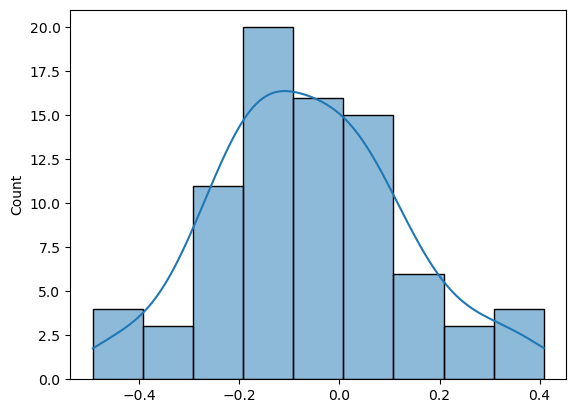

In [87]:
sns.histplot(residuals,kde=True)


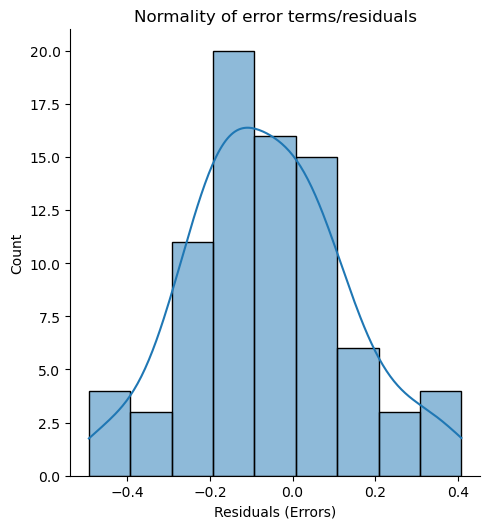

In [88]:
sns.displot(residuals,kde=True)
plt.xlabel('Residuals (Errors)')
plt.title('Normality of error terms/residuals')
plt.show()

The residual terms are somewhat normally distributed for the number of the given data points. According to the central limit theorem, the sample size increases the distribution tends to be normal. A skew is also visible from the plot. It's very difficult to get perfect curves, distributions in real life data. So, we will assume that this to be true.

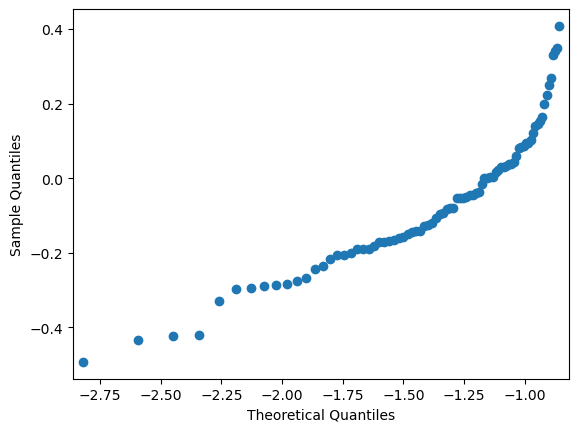

In [89]:
sm.qqplot(residuals,line='s')
plt.show()

In [90]:
from scipy.stats import shapiro
# H0: Data follows Normal Distribution
# Ha: Data does not follow Normal Distribution

alpha = 0.05

test_statistics, p_value = shapiro(residuals)
print(f'p_value: {p_value:.2f}')

if p_value < alpha:
    print('Reject Null Hypothesis. Data does not follow Normal Distribution')
else:
    print('Fail to reject Null Hypothesis. Data follows Normal Distribution')

p_value: 1.00
Fail to reject Null Hypothesis. Data follows Normal Distribution


### 5. Homoscedasticity

Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms.

(0.0, 1.0)

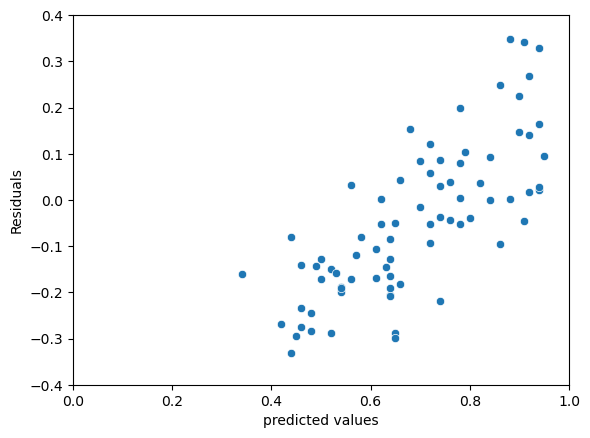

In [91]:
p = sns.scatterplot(x=y_train,y=residuals)
plt.xlabel('predicted values')
plt.ylabel('Residuals')
plt.ylim(-0.4,0.4)
plt.xlim(0,1)
#p = sns.lineplot([0,26],[0,0],color='blue')

**Performing Goldfeld-Quandt Test to check if Homoscedasticity is present or not.**

**Null Hypothesis(H0):** Homoscedasticity is present.

**Alternative Hypothesis(HA):** Heteroscedasticity is present. (Homoscedasticity is not present.)


In [75]:
# Goldfeld Quandt Test
import statsmodels.stats.api as sms
alpha = 0.05  # significance level


f_statistics,p_value,_ = sms.het_goldfeldquandt(y_train,X_train_new)
print(f'p_value: {p_value:.4f}')

if p_value < alpha:
    print('Reject Null Hypothesis. Homoscedasticity is not present.')
else:
    print('Fail to reject Null Hypothesis. Homoscedasticity is present.')

p_value: 0.3888
Fail to reject Null Hypothesis. Homoscedasticity is present.


**Homoscedasticity is present.**

In [ ]:
### 2. Mean of Residuals

Residuals as we know are the differences between the true value and the predicted value. One of the assumptions of linear regression is that the mean of the residuals should be zero.

y_pred = model.predict(X_train_sm)
residuals = y_pred - y_train
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

**Mean of residuals is very close to Zero.**

### 3. No Multi-collinearity

In regression, multicollinearity refers to the extent to which independent variables are correlated. Multicollinearity affects the coefficients and p-values, but it does not influence the predictions, precision of the predictions, and the goodness-of-fit statistics. 

# Multicollinearity check by VIF score
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif = pd.DataFrame()  # empty DataFrame to store VIF values
#X_T = pd.DataFrame(X_train_scaled,columns=X_train.columns)  # add values and columns to DataFrame


vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(pd.DataFrame(X_train_scaled).values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

There are no features with vif score >5 so we will not drop any features.

### 4. Normality of residuals (errors)

y_pred = model.predict(X_train_sm)
residuals = y_pred - y_train 
print("residuals :",residuals.shape)

sns.histplot(residuals,kde=True)
plt.xlabel('Residuals (Errors)')
plt.title('Normality of error terms/residuals')
plt.show()

The residual terms are somewhat normally distributed for the number of the given data points. According to the central limit theorem, the sample size increases the distribution tends to be normal. A skew is also visible from the plot. It's very difficult to get perfect curves, distributions in real life data. So, we will assume that this to be true.

sm.qqplot(residuals,line='s')
plt.show()

from scipy.stats import shapiro
# H0: Data follows Normal Distribution
# Ha: Data does not follow Normal Distribution

alpha = 0.05

test_statistics, p_value = shapiro(residuals)
print(f'p_value: {p_value:.2f}')

if p_value < alpha:
    print('Reject Null Hypothesis. Data does not follow Normal Distribution')
else:
    print('Fail to reject Null Hypothesis. Data follows Normal Distribution')

### 5. Homoscedasticity

Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms.

sns.scatterplot(x = y_train, y = residuals)
plt.xlabel('Labels')
plt.ylabel('Residuals (Errros)')
plt.title('Train values vs Residuals')
plt.show()

sns.scatterplot(x = y_pred, y = residuals)
plt.xlabel('Labels')
plt.ylabel('Residuals (Errros)')
plt.title('Predicted values vs Residuals')
plt.show()

**Performing Goldfeld-Quandt Test to check if Homoscedasticity is present or not.**

**Null Hypothesis(H0):** Homoscedasticity is present.

**Alternative Hypothesis(HA):** Heteroscedasticity is present. (Homoscedasticity is not present.)


# Goldfeld Quandt Test
import statsmodels.stats.api as sms
alpha = 0.05  # significance level


f_statistics,p_value,_ = sms.het_goldfeldquandt(y_train,X_train_sm)
print(f'p_value: {p_value:.4f}')

if p_value < alpha:
    print('Reject Null Hypothesis. Homoscedasticity is not present.')
else:
    print('Fail to reject Null Hypothesis. Homoscedasticity is present.')

**Homoscedasticity is present.**

### Assumptions for Linear Regression

#### 1. Linearity

Linear regression needs the relationship between the independent and dependent variables to be linear. Let's use a pair plot to check the relation of independent variables with the dependent variable (Chance of Admit).

In [ ]:
# to check independent features are linearly correlated with target feature

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

**Insight**

- CGPA, GRE Score, TOEFL Score are the top 3 features which are highly correlated with Chance of Admit.

- Research, LOR, SOP, University Rating are moderately correlated with Chance of Admit (0.5 to 0.7).

- GRE Score and TOEFL Score are highly correlated.

- GRE Score and CGPA, TOEFL Score and CGPA - are highly correlated.

- Research is moderately correlated with other featuers.

**Performing pearson correlation test to confirm if independent features are linearly correlated with target feature.**

**Null Hypothesis, H0:** No correlation between Independent Feature and Target Feature (Chance of Admit).

**Alternate Hypothesis, Ha:** There is a correlation between Independent Feature and Target Feature (Chance of Admit).

In [ ]:
# significance level
alpha = 0.05
independent_features = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']

for cols in independent_features:
    print(f'{cols} vs Chance of Admit')
    # pearson correlation test
    correlation_coefficient, p_value = pearsonr(df[cols],df['Chance of Admit'])
    print()
    print(f"Correlation Coefficient: {correlation_coefficient:.4f}")
    print(f"P-Value: {p_value:.4f}")
    
    # Interpret the results
    if p_value < alpha:
        print(f"There is a correlation between {cols} vs Chance of Admit.")
    else:
        print(f"There is no significant correlation between {cols} vs Chance of Admit.")
    print('--'*50)

**Before checking for rest of the assumptions we need to first perform Linear Regression.**

Fitting the linear model.

In [ ]:

from sklearn.model_selection import train_test_split  # train and test split
from sklearn.preprocessing import StandardScaler  # standardisation
import statsmodels.api as sm  # linear regression
from sklearn.metrics import r2_score   # sklearn r2_score
from statsmodels.tools.eval_measures import rmse  # root mean square error
from statsmodels.tools.eval_measures import meanabs,mse  # mean absolute error


In [ ]:
# independent features / columns

#X = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
      # 'Research']]
X = df.drop(['Chance of Admit'], axis=1)
print('X:',X.shape)

# target / dependent feature / column
y = df['Chance of Admit']
print('Y:',y.shape)

### Train and Test Split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)  # splitting data

print('X_train',X_train.shape)

print('y_train',y_train.shape)

print('X_test',X_test.shape)

print('y_test',y_test.shape)

### Scaling

In [ ]:

ss = StandardScaler()  # initialising
X_train_scaled = ss.fit_transform(X_train)  # learning and performing scaling on X train data
X_test_scaled = ss.transform(X_test)  # performing scaling on X test data


**Performing Linear Regression using statsmodels: OLS**

In [ ]:
# performing Linear Regression using statsmodels on train dataset

X_train_sm = sm.add_constant(X_train_scaled)  # to include and learn bias

lr_sm = sm.OLS(y_train,X_train_sm)

model = lr_sm.fit()

features = ['const','GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research']
print(model.summary(xname=features))




In [ ]:
# model coefficients of train dataset with column names

coeff = model.params.reset_index().replace({'x1':'GRE Score',
                                           'x2': 'TOEFL Score',
                                           'x3': 'University Rating',
                                           'x4': 'SOP',
                                           'x5': 'LOR',
                                           'x6' : 'CGPA',
                                           'x7': 'Research'})
coeff.rename(columns={'index':'Features',0:'Weights'})


In [ ]:
# adjusted r2_score
def adj_r2(r2_score,n,k):
    return 1 - ((1 - r2_score) * (n-1) / (n-k-1))

**MSE** - The Mean Squared Error (MSE) is the average of the squared difference between the actual value and predicted values by the regression model.

**MAE** - The Mean Absolute Error (MAE) measures the average absolute magnitude between the actual values and the predicted values by regression model.

In [ ]:
# checking the performance of the model on test data

X_test_sm = sm.add_constant(X_test_scaled)  # to include and learn bias

y_pred = model.predict(X_test_sm)  # test y prediction 
y_pred_train = model.predict(X_train_sm)  # train y prediction 

train_r2_score = r2_score(y_train,y_pred_train)  # r2_score for train set
test_r2_score = r2_score(y_test,y_pred)  # r2_score for test set

train_adj_r2 = adj_r2(train_r2_score,X_train_sm.shape[0],X_train_sm.shape[1])  # adjusted r2_score for train set
test_adj_r2 = adj_r2(r2_score(y_test,y_pred),X_test_sm.shape[0],X_test_sm.shape[1])  # adjusted r2_score for test set



print('Train R squared value:' , train_r2_score)  # r2_score for train set
print('Test R squared value:',test_r2_score)  # r2_score for test set
print('Train Adj r2_score:', train_adj_r2)  # adjusted r2_score for train set
print('Test Adj r2_score:',test_adj_r2)  # adjusted r2_score for test set
print('Test RSS Score:',np.sum((y_test-y_pred)**2))  # residual sum of squares
print('Test MSE score:',mse(y_test,y_pred))  # mean square error
print('Test RMSE score:',rmse(y_test, y_pred))  # rmse score
print('Test MAE score:',meanabs(y_test, y_pred))  # mae score

**Linear Regression model summary**

- The model is perfoming good on training data as per the values of R2(0.826 =83%) and Adj. R2 values(0.822 =82%).
- A high F-statistic value (265.1) suggests that the model as a whole is statistically significant.
- The p-values associated with each coefficient (independent variable) indicate whether each variable has a statistically significant impact on the dependent variable( Chance of Admit). GRE Score, LOR, CGPA, and Research have p-values < 0.05, which means they have significant impact in predicting the target variable (Chance of Admit).
- 95% confidence interval range [0.025,0.975], indicates that the weight values for each coefficient(independent variables) will lie in the range.
- The weight value for CGPA(x6) is the highest which means CGPA has the most impact on Chance of Admit, followed by GRE Score(x1).
- The lower value of MAE, MSE, and RMSE is considered to be high accuracy regression model.

### 2. Mean of Residuals

Residuals as we know are the differences between the true value and the predicted value. One of the assumptions of linear regression is that the mean of the residuals should be zero.

In [ ]:
y_pred = model.predict(X_train_sm)
residuals = y_pred - y_train
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

**Mean of residuals is very close to Zero.**

### 3. No Multi-collinearity

In regression, multicollinearity refers to the extent to which independent variables are correlated. Multicollinearity affects the coefficients and p-values, but it does not influence the predictions, precision of the predictions, and the goodness-of-fit statistics. 

In [ ]:
# Multicollinearity check by VIF score
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif = pd.DataFrame()  # empty DataFrame to store VIF values
#X_T = pd.DataFrame(X_train_scaled,columns=X_train.columns)  # add values and columns to DataFrame


vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(pd.DataFrame(X_train_scaled).values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

There are no features with vif score >5 so we will not drop any features.

### 4. Normality of residuals (errors)

In [ ]:
y_pred = model.predict(X_train_sm)
residuals = y_pred - y_train 
print("residuals :",residuals.shape)

In [ ]:
sns.histplot(residuals,kde=True)
plt.xlabel('Residuals (Errors)')
plt.title('Normality of error terms/residuals')
plt.show()

The residual terms are somewhat normally distributed for the number of the given data points. According to the central limit theorem, the sample size increases the distribution tends to be normal. A skew is also visible from the plot. It's very difficult to get perfect curves, distributions in real life data. So, we will assume that this to be true.

In [ ]:
sm.qqplot(residuals,line='s')
plt.show()

In [ ]:
from scipy.stats import shapiro
# H0: Data follows Normal Distribution
# Ha: Data does not follow Normal Distribution

alpha = 0.05

test_statistics, p_value = shapiro(residuals)
print(f'p_value: {p_value:.2f}')

if p_value < alpha:
    print('Reject Null Hypothesis. Data does not follow Normal Distribution')
else:
    print('Fail to reject Null Hypothesis. Data follows Normal Distribution')

### 5. Homoscedasticity

Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms.

In [ ]:
sns.scatterplot(x = y_train, y = residuals)
plt.xlabel('Labels')
plt.ylabel('Residuals (Errros)')
plt.title('Train values vs Residuals')
plt.show()

In [ ]:
sns.scatterplot(x = y_pred, y = residuals)
plt.xlabel('Labels')
plt.ylabel('Residuals (Errros)')
plt.title('Predicted values vs Residuals')
plt.show()

**Performing Goldfeld-Quandt Test to check if Homoscedasticity is present or not.**

**Null Hypothesis(H0):** Homoscedasticity is present.

**Alternative Hypothesis(HA):** Heteroscedasticity is present. (Homoscedasticity is not present.)


In [ ]:
# Goldfeld Quandt Test
import statsmodels.stats.api as sms
alpha = 0.05  # significance level


f_statistics,p_value,_ = sms.het_goldfeldquandt(y_train,X_train_sm)
print(f'p_value: {p_value:.4f}')

if p_value < alpha:
    print('Reject Null Hypothesis. Homoscedasticity is not present.')
else:
    print('Fail to reject Null Hypothesis. Homoscedasticity is present.')

**Homoscedasticity is present.**

**Insight**

1. There is a linear relation between independent variables and dependent variable(Chance of Admit).
2. Mean of residual is almost zero.We can observe that most of the assumptions were followed.
3. Residuals are normally distributed.
4. Multi-collinearity among independent variables was not present.
5. Homoscedasticity is present.

## Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures  # for creating features with degrees
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score  # linear regression r2_score
degree = 2
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(X)

# scaling
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)
X_train,X_test,y_train,y_test = train_test_split(X_poly_scaled,y,test_size=0.2,random_state=10)

# linear regression

lr = LinearRegression()
sk_lr = lr.fit(X_train,y_train)
print(f'R2_score of train set for degree {degree}: {sk_lr.score(X_train,y_train)}')
print(f'R2_score of test set for degree {degree}: {sk_lr.score(X_test,y_test)}')

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [ ]:
from sklearn.pipeline import make_pipeline  # to perform Polynomial Regression, Scaling and Linear Regression in one line
degree = 10

scaler = StandardScaler()
model = LinearRegression()
for deg in range(1,degree+1):
    polyreg_scaled = make_pipeline(PolynomialFeatures(deg), StandardScaler(), model)
    polyreg_scaled.fit(X_train, y_train)
    train_score = polyreg_scaled.score(X_train, y_train)
    test_score = polyreg_scaled.score(X_test, y_test)
    
    
    print("*"*50)
    print("Degree:", deg)
    print("Train r2_score:",polyreg_scaled.score(X_train,y_train))
    print("Test r2_score:",polyreg_scaled.score(X_test,y_test))

**Insights**

The model is performing good on degree= 2 and degree= 3. On degree=3, the model kind of looks a overfit due to high gap between r2_score of train and test set. On degree=2 the gap between train and test set r2_score is less which can be a good model. We will use degree =2 to perform further performance test.

### Ridge and Lasso Regression

**Ridge Regression** adds a penalty term proportional to the square of the coefficients, while **Lasso** adds a penalty term proportional to the absolute value of the coefficients, which can lead to variable selection.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import make_pipeline

degree = 2
alpha = 0.001

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

scaler = StandardScaler()

lr = LinearRegression()  # linear regression
ridge = Ridge(alpha)  # ridge regression
lasso = Lasso(alpha)  # lasso regression

models = (lr,ridge,lasso)
for model in models:
    polyreg_scaled = make_pipeline(PolynomialFeatures(degree), StandardScaler(), model)
    polyreg_scaled.fit(X_train, y_train)
    train_score = polyreg_scaled.score(X_train, y_train)
    test_score = polyreg_scaled.score(X_test, y_test)
    
    
    print("*"*50)
    print("Model:", model)
    print('Degree:',degree)
    print('alpha:',alpha)
    print("Train r2_score:",polyreg_scaled.score(X_train,y_train))
    print("Test r2_score:",polyreg_scaled.score(X_test,y_test))
    
    
    
    

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import make_pipeline

train_scores = []
test_scores = []

degree = 2
alpha = 0.001

lr=LinearRegression()
ridge=Ridge(alpha)
lasso = Lasso(alpha)

models=(lr,ridge,lasso)
for model in models:
    polyreg_scaled = make_pipeline(PolynomialFeatures(degree), StandardScaler(), model)
    polyreg_scaled.fit(X_train, y_train)
    train_score = polyreg_scaled.score(X_train, y_train)
    test_score = polyreg_scaled.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    
    
    print("*"*50)
    print("Model:", model)
    print('Degree:',degree)
    print('alpha:',alpha)
    print("Train r2_score:",polyreg_scaled.score(X_train,y_train))
    print("Test r2_score:",polyreg_scaled.score(X_test,y_test))
    


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import make_pipeline

train_scores = []
test_scores = []

degree = 3
alpha = 0.001

lr=LinearRegression()
ridge=Ridge(alpha)
lasso = Lasso(alpha)

models=(lr,ridge,lasso)
for model in models:
    polyreg_scaled = make_pipeline(PolynomialFeatures(degree), StandardScaler(), model)
    polyreg_scaled.fit(X_train, y_train)
    train_score = polyreg_scaled.score(X_train, y_train)
    test_score = polyreg_scaled.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    
    
    print("*"*50)
    print("Model:", model)
    print('Degree:',degree)
    print('alpha:',alpha)
    print("Train r2_score:",polyreg_scaled.score(X_train,y_train))
    print("Test r2_score:",polyreg_scaled.score(X_test,y_test))
    


**Insight**

We can observe that at degree = 2 and alpha = 0.001( for Ridge and Lasso) the model performance has improved. Ridge Regression is performing better than Linear Regression and Lasso Regression.


## Recommendations

1. GRE Score, LOR, CGPA and Research have p_values < 0.05. These can help in predicting Chances of admission.
2. CGPA is the most important predictor while predicting the chances of admission.
3. Student with high GRE score and high CGPA have more chances of admission.
4. Following are the final model results on the test data:
    - RMSE: 0.059
    - MAE: 0.040
    - R2_score: 0.84
    - Adjusted_R2: 0.82